In [136]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import yfinance as yf
import hvplot.pandas
import seaborn as sns
from pathlib import Path


In [155]:
# global variables 
indexes = 'SPY QQQ IWM DIA'
sectors = 'IYC IYH IYK IYR IYZ XLB XLE XLF XLI XLK XLU'
index_plus_sectors = indexes + ' ' + sectors
optionable_stocks_path = Path('./Resources/optionable_stocks.csv')
with open(optionable_stocks_path, 'r') as file:
    optionable_stocks = file.read()
optionable_stocks = optionable_stocks.replace('\n', ' ')

# dates
trading_days_year = 252
total_days_year = 365
thirty_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 30)).date()
ten_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 10)).date()
five_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 5)).date()
three_years_ago = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 3)).date()
one_year = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year * 1)).date()
six_months = (pd.Timestamp.today() - pd.Timedelta(days = total_days_year / 2)).date()
yesterday = (pd.Timestamp.today() - pd.Timedelta(days = 1)).date()


In [79]:
# method for getting close prices on a list of stocks
# important - don't put unnecessary spaces in the tickers, especially if it's a single ticker
def get_close(start, end, tickers = 'spy'):
    
    if len(tickers) < 4:
        df = yf.Ticker(tickers)
        data = df.history(start=start, end=end)
        data = data['Close']
        data.dropna(inplace= True)
        data = data.rename(tickers)
    else:
        df = yf.Tickers(tickers)
        data = df.history(start=start, end=end)
        data = data['Close']
        data.dropna(inplace= True)    
    return data

# method for getting cumulative return on a stock from a series of close prices
def get_cumprod(series):
    series = series.pct_change()
    series = (series + 1).cumprod()
    return series

# get correlation matrix from multiple series
def get_corr(stocks = []):
    all_stocks = pd.concat(stocks, axis=1).dropna()
    all_stocks = all_stocks.corr()
    return all_stocks

In [118]:
sectors = get_cumprod(get_close(thirty_years_ago, yesterday, tickers = index_plus_sectors))
sectors_10 = get_cumprod(get_close(ten_years_ago, yesterday, tickers = index_plus_sectors))
sectors_5 = get_cumprod(get_close(five_years_ago, yesterday, tickers = index_plus_sectors))
sectors_3 = get_cumprod(get_close(three_years_ago, yesterday, tickers = index_plus_sectors))
sectors_1 = get_cumprod(get_close(one_year, yesterday, tickers = index_plus_sectors))
sectors_6_months = get_cumprod(get_close(six_months, yesterday, tickers = index_plus_sectors))

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed


In [119]:
sectors.hvplot().opts(height = 400,
                     width = 1000)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [120]:
sectors_corr_30 = sectors.corr()
sectors_corr_10 = sectors_10.corr()
sectors_corr_5 = sectors_5.corr()
sectors_corr_3 = sectors_3.corr()
sectors_corr_1 = sectors_1.corr()
sectors_corr_6_months = sectors_6_months.corr()

<AxesSubplot:>

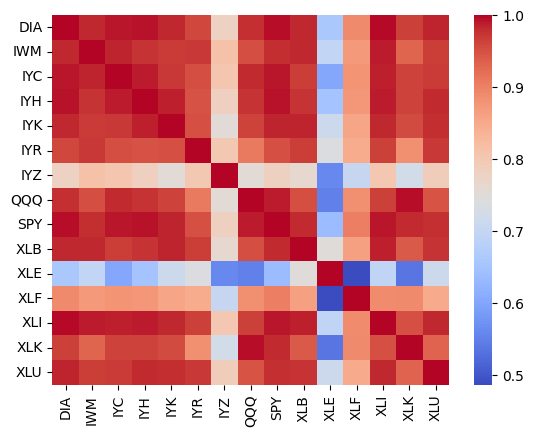

In [121]:
sns.heatmap(sectors_corr_30, cmap = 'coolwarm')

<AxesSubplot:>

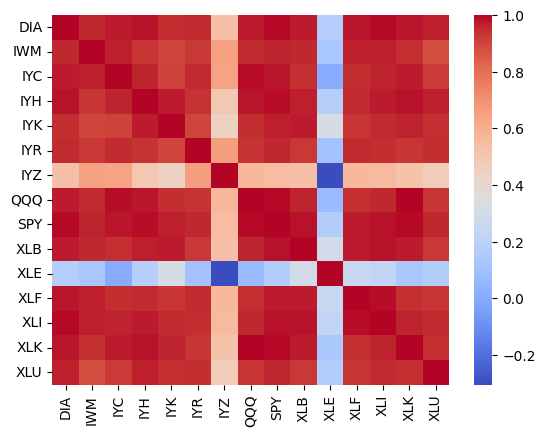

In [122]:
sns.heatmap(sectors_corr_10, cmap = 'coolwarm')

<AxesSubplot:>

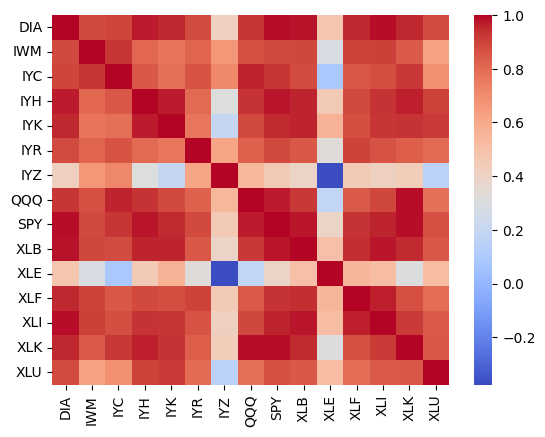

In [123]:
sns.heatmap(sectors_corr_5, cmap = 'coolwarm')

<AxesSubplot:>

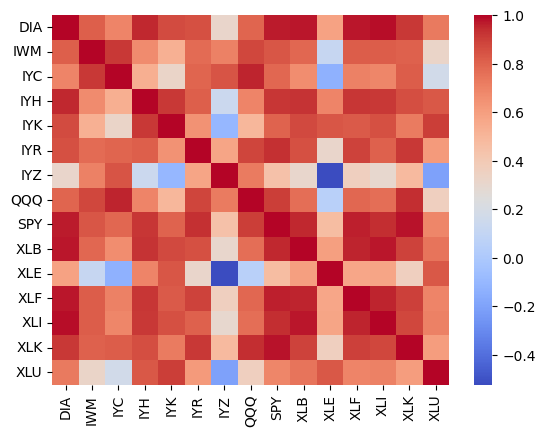

In [124]:
sns.heatmap(sectors_corr_3, cmap = 'coolwarm')

<AxesSubplot:>

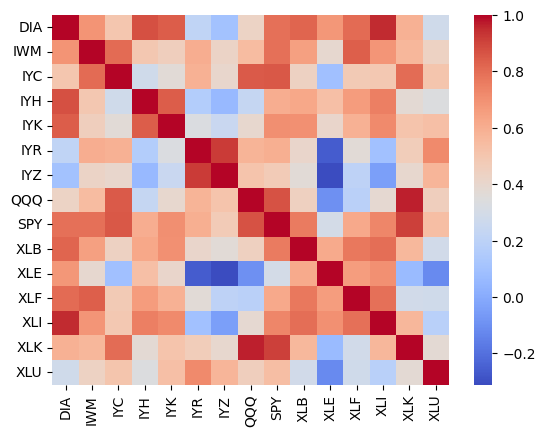

In [125]:
sns.heatmap(sectors_corr_1, cmap = 'coolwarm')

<AxesSubplot:>

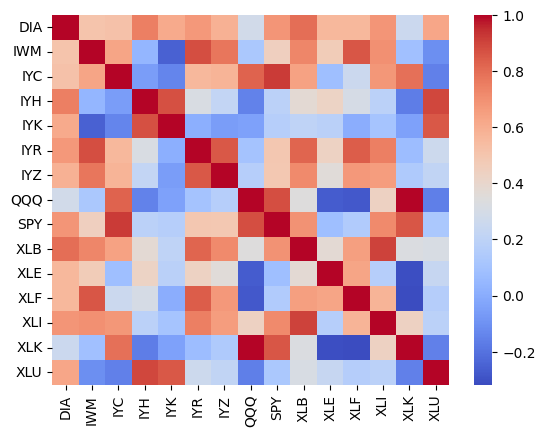

In [128]:
sns.heatmap(sectors_corr_6_months, cmap = 'coolwarm')

[*********************100%***********************]  95 of 95 completed


<AxesSubplot:>

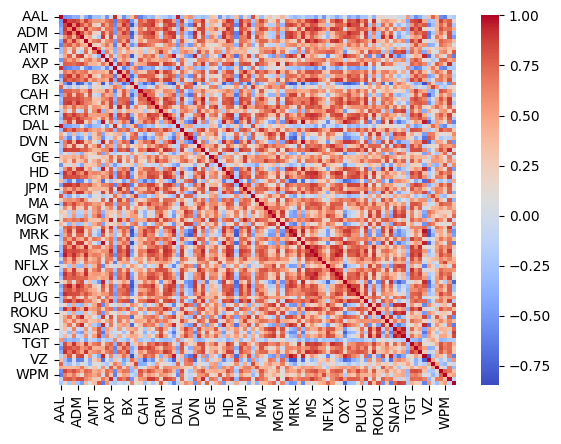

In [157]:
opt_stocks_df = get_cumprod(get_close(thirty_years_ago, yesterday, tickers = optionable_stocks))
opt_corr = opt_stocks_df.corr()
sns.heatmap(opt_corr, cmap = 'coolwarm')

In [158]:
display(opt_corr)

,AAL,AAPL,ABBV,ABT,ADM,AFL,AMD,AMGN,AMT,AMZN,...,TMUS,TSLA,VLO,VZ,WBA,WELL,WMT,WPM,X,ZM
AAL,1.000000,-0.534411,-0.498540,-0.366522,-0.392691,0.039584,-0.420114,-0.606743,-0.269668,-0.272006,...,-0.553595,-0.399587,-0.112239,0.329263,0.754689,0.439617,-0.551009,-0.627093,-0.077640,-0.214932
AAPL,-0.534411,1.000000,0.860837,0.886882,0.827115,0.594936,0.876081,0.690212,0.536438,0.538671,...,0.867687,0.924593,0.467802,-0.298971,-0.210506,0.372929,0.867357,0.665764,0.770398,0.167626
ABBV,-0.498540,0.860837,1.000000,0.633295,0.959810,0.795483,0.586421,0.777321,0.257721,0.094636,...,0.821449,0.701085,0.790934,-0.600014,-0.295684,0.390724,0.726084,0.486344,0.801925,-0.233563
ABT,-0.366522,0.886882,0.633295,1.000000,0.611719,0.436195,0.912454,0.524873,0.643973,0.732784,...,0.735909,0.905395,0.190834,0.017241,0.043603,0.376937,0.820074,0.674433,0.704357,0.407373
ADM,-0.392691,0.827115,0.959810,0.611719,1.000000,0.846871,0.535654,0.738556,0.235478,0.068429,...,0.795282,0.698439,0.824809,-0.615332,-0.232727,0.459187,0.692196,0.389586,0.831270,-0.256007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WELL,0.439617,0.372929,0.390724,0.376937,0.459187,0.676514,0.344897,0.025138,0.310392,0.034842,...,0.195735,0.413097,0.462736,-0.003113,0.496183,1.000000,0.187538,-0.062024,0.665573,-0.308056
WMT,-0.551009,0.867357,0.726084,0.820074,0.692196,0.475029,0.761251,0.702026,0.427745,0.544436,...,0.840748,0.775703,0.323671,-0.213947,-0.238226,0.187538,1.000000,0.766830,0.687213,0.343409
WPM,-0.627093,0.665764,0.486344,0.674433,0.389586,0.093034,0.663480,0.601228,0.484291,0.639471,...,0.663149,0.545404,0.043929,0.046793,-0.340312,-0.062024,0.766830,1.000000,0.387416,0.502842
X,-0.077640,0.770398,0.801925,0.704357,0.831270,0.832304,0.616261,0.491741,0.308423,0.255732,...,0.715022,0.736460,0.639753,-0.336039,0.139652,0.665573,0.687213,0.387416,1.000000,-0.109888
